In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit import models

In [2]:
# Opening File

# Importing Data
x = []
y = []

# Open file in read mode
with open("20251105 Na-22 01.csv", "r", newline="") as file:
    # Skip header
    next(file)

    for line in file:
        # split column
        line_splitted = line.split(",")
        x.append(float(line_splitted[0]))
        y.append(float(line_splitted[1]))

# Convert lists to numpy arrays
x_array = np.array(x)
y_array = np.array(y)



In [3]:
# Define ranges of masked / unmasked ranges

# Define the two unmasked x-ranges
x_min1, x_max1 = 60, 1240
x_min2, x_max2 = 1822, 2336

# Create boolean masks for each unmasked range
mask_range1 = (x_array >= x_min1) & (x_array <= x_max1)
mask_range2 = (x_array >= x_min2) & (x_array <= x_max2)

# Combine both unmasked ranges
unmasked_mask = mask_range1 | mask_range2

# Masked = everything outside both ranges
masked_mask = ~unmasked_mask

# Separate data for plotting/fitting
x_selection_1 = x_array[mask_range1]
y_selection_1 = y_array[mask_range1]

x_selection_2 = x_array[mask_range2]
y_selection_2 = y_array[mask_range2]

x_masked = x_array[masked_mask]
y_masked = y_array[masked_mask]



In [4]:
# Fit to Gaussian funtion

# --- Fit Gaussian to first range ---
gauss1 = models.GaussianModel(prefix='g1_')
pars1 = gauss1.guess(y_selection_1, x=x_selection_1)
result1 = gauss1.fit(y_selection_1, pars1, x=x_selection_1)

print(x_selection_1)
print(y_selection_1)
print(max(y_selection_1))

# Fit Gaussian to second range
gauss2 = models.GaussianModel(prefix="g2_")
pars2 = gauss2.guess(y_selection_2, x=x_selection_2)
result2 = gauss2.fit(y_selection_2, pars2, x=x_selection_2)


[  98.03921569  137.25490196  176.47058824  215.68627451  254.90196078
  294.11764706  333.33333333  372.54901961  411.76470588  450.98039216
  490.19607843  529.41176471  568.62745098  607.84313725  647.05882353
  686.2745098   725.49019608  764.70588235  803.92156863  843.1372549
  882.35294118  921.56862745  960.78431373 1000.         1039.21568627
 1078.43137255 1117.64705882 1156.8627451  1196.07843137 1235.29411765]
[ 48. 119.  66.  87.  88. 100. 105. 122. 112. 127. 114.  92. 138. 139.
 155. 127. 136. 128. 105.  84.  88.  78.  57.  71.  48.  64.  53.  60.
  50.  56.]
155.0


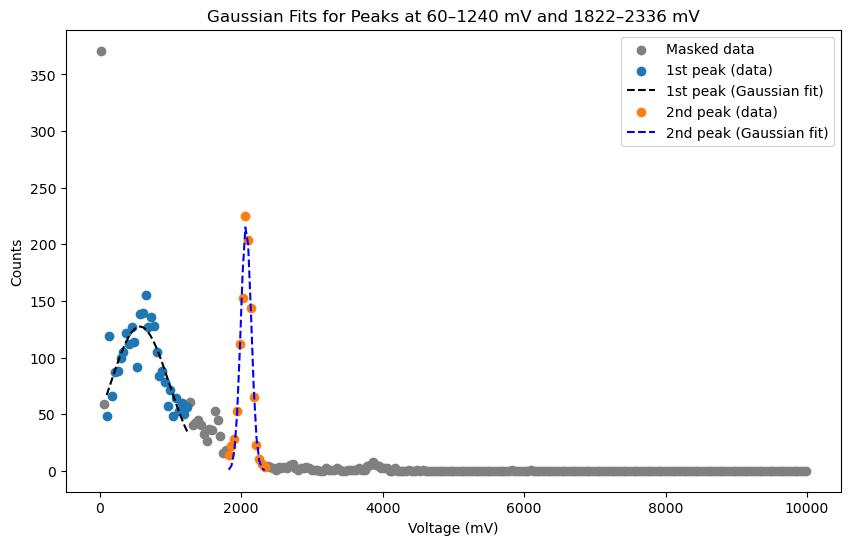

In [5]:
# Creating Plot with Gaussian fits

plt.figure(figsize=(10, 6))

# Masked data (outside both peaks)
plt.scatter(x_masked, y_masked, color="grey", label="Masked data")

# Unmasked and fitted data for each peak
plt.scatter(x_selection_1, y_selection_1, label="1st peak (data)")
plt.plot(x_selection_1, result1.best_fit, "k--", label="1st peak (Gaussian fit)")

plt.scatter(x_selection_2, y_selection_2, label="2nd peak (data)")
plt.plot(x_selection_2, result2.best_fit, "b--", label="2nd peak (Gaussian fit)")

plt.xlabel("Voltage (mV)")
plt.ylabel("Counts")
plt.title("Gaussian Fits for Peaks at 60–1240 mV and 1822–2336 mV")
plt.legend()
plt.show()



In [6]:
# Printing fit result

print("\n=== Gaussian Fit 1 (60–1240 mV) ===")
print(result1.fit_report())

print("\n=== Gaussian Fit 2 (1822–2336 mV) ===")
print(result2.fit_report())



=== Gaussian Fit 1 (60–1240 mV) ===
[[Model]]
    Model(gaussian, prefix='g1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 30
    # variables        = 3
    chi-square         = 8042.78145
    reduced chi-square = 297.880795
    Akaike info crit   = 173.739986
    Bayesian info crit = 177.943578
    R-squared          = 0.72922389
[[Variables]]
    g1_amplitude:  132059.197 +/- 7397.18224 (5.60%) (init = 107000)
    g1_center:     567.876489 +/- 22.7143577 (4.00%) (init = 538.4615)
    g1_sigma:      413.653255 +/- 29.9619655 (7.24%) (init = 333.3333)
    g1_fwhm:       974.078958 +/- 70.5550354 (7.24%) == '2.3548200*g1_sigma'
    g1_height:     127.362711 +/- 5.34881245 (4.20%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(g1_amplitude, g1_sigma)  = +0.8159
    C(g1_center, g1_sigma)     = -0.2961
    C(g1_amplitude, g1_center) = -0.2906

=== Gaussian Fit 2 (1